In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import rc
from tqdm import tqdm
from datetime import timedelta, date

In [4]:
data = pd.read_csv("./target/train.csv")
data.head()

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308


In [5]:
min_max_scaler = MinMaxScaler()

In [6]:
def converting_to_real_dt(col):
    new_col = []
    format_t = '%Y%m%d'
    for i in col:
        dt = datetime.datetime.strptime(str(i), format_t).date()
        new_col.append(dt)
    return new_col

In [7]:
data["date"] = converting_to_real_dt(data["일시"])
data.drop(["일시"], axis=1, inplace=True)

In [8]:
data["광진구"] = min_max_scaler.fit_transform(data["광진구"].to_numpy().reshape(-1,1))
data["동대문구"] = min_max_scaler.fit_transform(data["동대문구"].to_numpy().reshape(-1,1))
data["성동구"] = min_max_scaler.fit_transform(data["성동구"].to_numpy().reshape(-1,1))
data["중랑구"] = min_max_scaler.fit_transform(data["중랑구"].to_numpy().reshape(-1,1))

In [9]:
data_1_whole = data[["date", "광진구"]]
data_1_whole["ans"] = list(data_1_whole["광진구"])
data_1_whole.drop(["광진구"], axis=1, inplace=True)

data_2_whole = data[["date", "동대문구"]]
data_2_whole["ans"] = list(data_2_whole["동대문구"])
data_2_whole.drop(["동대문구"], axis=1, inplace=True)

data_3_whole = data[["date", "성동구"]]
data_3_whole["ans"] = list(data_3_whole["성동구"])
data_3_whole.drop(["성동구"], axis=1, inplace=True)

data_4_whole = data[["date", "중랑구"]]
data_4_whole["ans"] = list(data_4_whole["중랑구"])
data_4_whole.drop(["중랑구"], axis=1, inplace=True)

/var/folders/1q/wqtxt2sd5fb1fj15h5y1_kjm0000gn/T/ipykernel_23357/343568806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_whole["ans"] = list(data_1_whole["광진구"])
/var/folders/1q/wqtxt2sd5fb1fj15h5y1_kjm0000gn/T/ipykernel_23357/343568806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_whole.drop(["광진구"], axis=1, inplace=True)
/var/folders/1q/wqtxt2sd5fb1fj15h5y1_kjm0000gn/T/ipykernel_23357/343568806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [10]:
def converting_to_real_dt(l):
    new_l = []
    format_t = '%Y-%m-%d'
    for i in l:
        dt = datetime.datetime.strptime(i, format_t).date()
        new_l.append(dt)
    return new_l

In [11]:
time_1_res = pd.read_csv("./result/time_Gwang.csv")
time_2_res = pd.read_csv("./result/time_Dong.csv")
time_3_res = pd.read_csv("./result/time_Seong.csv")
time_4_res = pd.read_csv("./result/time_Jung.csv")

In [12]:
time_1_res = pd.read_csv("./result/time_Gwang.csv")
time_1_res["time"] = list(time_1_res["real"])
time_1_res.drop(["real", "Unnamed: 0"], axis=1, inplace=True)

time_2_res = pd.read_csv("./result/time_Dong.csv")
time_2_res["time"] = list(time_2_res["real"])
time_2_res.drop(["real", "Unnamed: 0"], axis=1, inplace=True)

time_3_res = pd.read_csv("./result/time_Seong.csv")
time_3_res["time"] = list(time_3_res["real"])
time_3_res.drop(["real", "Unnamed: 0"], axis=1, inplace=True)

time_4_res = pd.read_csv("./result/time_Jung.csv")
time_4_res["time"] = list(time_4_res["real"])
time_4_res.drop(["real", "Unnamed: 0"], axis=1, inplace=True)

In [13]:
time_1_res

,date,answer,time
0,2021-03-15,0.471022,0.554181
1,2021-03-16,0.468519,0.469692
2,2021-03-17,0.545311,0.442065
3,2021-03-18,0.576133,0.170074
4,2021-03-19,0.681639,0.470707
...,...,...,...
287,2021-12-27,0.252239,0.579531
288,2021-12-28,0.297023,0.804605
289,2021-12-29,0.295706,0.656872
290,2021-12-30,0.292677,0.712685


In [14]:
time_1_res.date = converting_to_real_dt(time_1_res["date"])
time_2_res.date = converting_to_real_dt(time_2_res["date"])
time_3_res.date = converting_to_real_dt(time_3_res["date"])
time_4_res.date = converting_to_real_dt(time_4_res["date"])

In [15]:
mlr_1_res = pd.read_csv("./result/mlr_Gwang.csv")
mlr_1_res["mlr"] = list(mlr_1_res["pred"])
mlr_1_res.drop(["pred", "Unnamed: 0"], axis=1, inplace=True)

mlr_2_res = pd.read_csv("./result/mlr_Dong.csv")
mlr_2_res["mlr"] = list(mlr_2_res["pred"])
mlr_2_res.drop(["pred", "Unnamed: 0"], axis=1, inplace=True)

mlr_3_res = pd.read_csv("./result/mlr_Seong.csv")
mlr_3_res["mlr"] = list(mlr_3_res["pred"])
mlr_3_res.drop(["pred", "Unnamed: 0"], axis=1, inplace=True)

mlr_4_res = pd.read_csv("./result/mlr_Jung.csv")
mlr_4_res["mlr"] = list(mlr_4_res["pred"])
mlr_4_res.drop(["pred", "Unnamed: 0"], axis=1, inplace=True)

In [16]:
mlr_1_res.date = converting_to_real_dt(mlr_1_res["date"])
mlr_2_res.date = converting_to_real_dt(mlr_2_res["date"])
mlr_3_res.date = converting_to_real_dt(mlr_3_res["date"])
mlr_4_res.date = converting_to_real_dt(mlr_4_res["date"])

In [17]:
p_data_1 = pd.merge(data_1_whole, time_1_res, how="left", on="date")
p_data_1.drop(["answer"], axis=1, inplace=True)
data_1 = pd.merge(p_data_1, mlr_1_res, how="left", on="date")
data_1.drop(["real"], axis=1, inplace=True)
data_1.tail()

,date,ans,time,mlr
1456,2021-12-27,0.252239,0.579531,0.111436
1457,2021-12-28,0.297023,0.804605,0.165878
1458,2021-12-29,0.295706,0.656872,0.162695
1459,2021-12-30,0.292677,0.712685,0.147444
1460,2021-12-31,0.238145,0.470839,0.151006


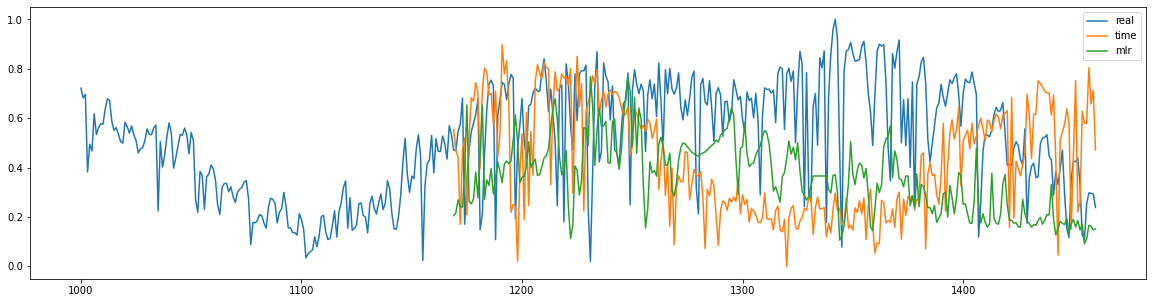

In [18]:
plt.figure(figsize=(20,5))
plt.plot(range(1000,1461),data_1["ans"][1000:], label="real")
plt.plot(range(1169,1461),data_1["time"][1169:], label="time")
plt.plot(range(1169,1461),data_1["mlr"][1169:], label="mlr")
plt.legend()
plt.show()

In [19]:
p_data_2 = pd.merge(data_2_whole, time_2_res, how="left", on="date")
p_data_2.drop(["answer"], axis=1, inplace=True)
data_2 = pd.merge(p_data_2, mlr_2_res, how="left", on="date")
data_2.drop(["real"], axis=1, inplace=True)
data_2.tail()

,date,ans,time,mlr
1456,2021-12-27,0.291766,0.307499,0.675831
1457,2021-12-28,0.332251,0.337672,0.613988
1458,2021-12-29,0.300991,0.347691,0.608005
1459,2021-12-30,0.305261,0.276218,0.616759
1460,2021-12-31,0.274172,0.351560,0.566080


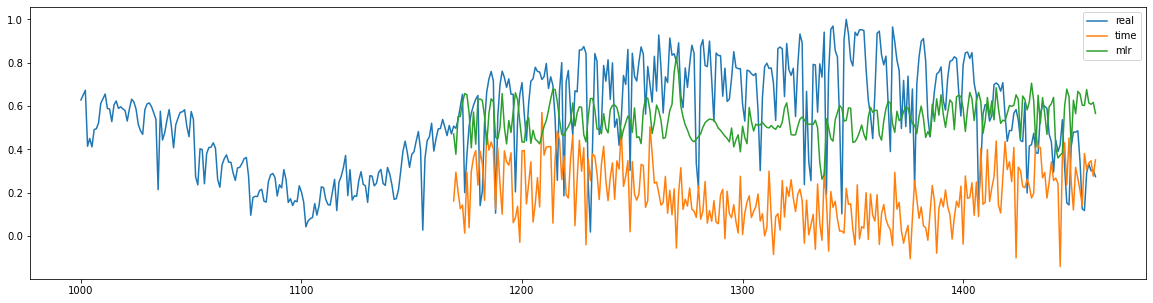

In [20]:
plt.figure(figsize=(20,5))
plt.plot(range(1000,1461),data_2["ans"][1000:], label="real")
plt.plot(range(1169,1461),data_2["time"][1169:], label="time")
plt.plot(range(1169,1461),data_2["mlr"][1169:], label="mlr")
plt.legend()
plt.show()

In [21]:
p_data_3 = pd.merge(data_3_whole, time_3_res, how="left", on="date")
p_data_3.drop(["answer"], axis=1, inplace=True)
data_3 = pd.merge(p_data_3, mlr_3_res, how="left", on="date")
data_3.drop(["real"], axis=1, inplace=True)
data_3.tail()

,date,ans,time,mlr
1456,2021-12-27,0.217567,0.647618,0.561753
1457,2021-12-28,0.277869,0.589643,0.589685
1458,2021-12-29,0.273829,0.670214,0.704589
1459,2021-12-30,0.264103,0.578072,0.617403
1460,2021-12-31,0.196020,0.651646,0.540825


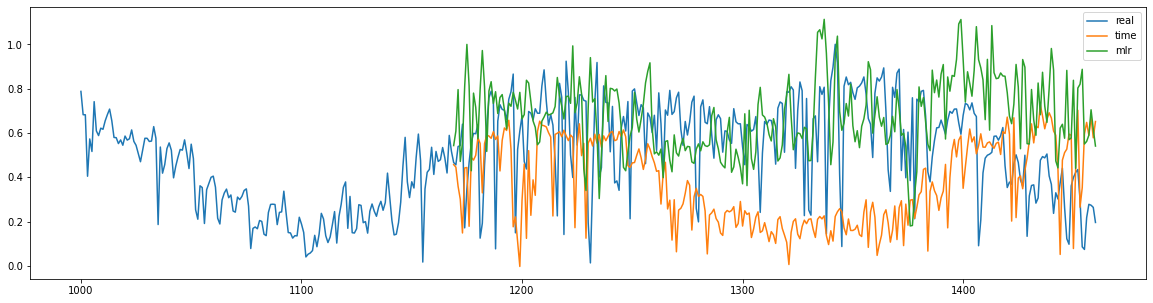

In [22]:
plt.figure(figsize=(20,5))
plt.plot(range(1000,1461),data_3["ans"][1000:], label="real")
plt.plot(range(1169,1461),data_3["time"][1169:], label="time")
plt.plot(range(1169,1461),data_3["mlr"][1169:], label="mlr")
plt.legend()
plt.show()

In [23]:
p_data_4 = pd.merge(data_4_whole, time_4_res, how="left", on="date")
p_data_4.drop(["answer"], axis=1, inplace=True)
data_4 = pd.merge(p_data_4, mlr_4_res, how="left", on="date")
data_4.drop(["real"], axis=1, inplace=True)
data_4.tail()

,date,ans,time,mlr
1456,2021-12-27,0.292725,0.415038,0.771499
1457,2021-12-28,0.336323,0.428565,0.914202
1458,2021-12-29,0.314400,0.604436,1.010677
1459,2021-12-30,0.312157,0.501840,0.921408
1460,2021-12-31,0.267314,0.746688,0.731269


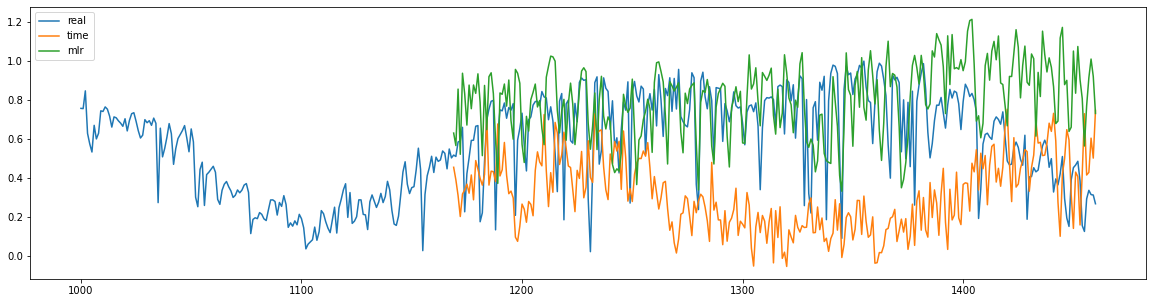

In [24]:
plt.figure(figsize=(20,5))
plt.plot(range(1000,1461),data_4["ans"][1000:], label="real")
plt.plot(range(1169,1461),data_4["time"][1169:], label="time")
plt.plot(range(1169,1461),data_4["mlr"][1169:], label="mlr")
plt.legend()
plt.show()

In [28]:
y_bias = abs(data_1["ans"]-data_1["time"])**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  39.69943008375842


In [29]:
y_bias = abs(data_2["ans"]-data_2["time"])**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  79.56157936858386


In [30]:
y_bias = abs(data_3["ans"]-data_3["time"])**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  39.733546933556774


In [31]:
y_bias = abs(data_4["ans"]-data_4["time"])**2
print("whole MSE: ", np.sum(y_bias))

whole MSE:  68.58725765724768
